In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import timeit
import time
import matplotlib.pyplot as plt

In [3]:
def KNN_predict(typei,train_X,train_Y,test_X,K,distance_metric = 'Eucledian'):
    result_array = []
    for t in test_X: 
        if(typei == 'classification'):
            max_val = findNN(train_X,train_Y, t,K,distance_metric)
            result_array.append(max_val)
        if(typei == 'regression'):
            val = findR(train_x,train_y,t,K,distance_metric)
            result_array.append(val)
        elif(typei == 'regression_plot'): 
            val = findRPlot(train_x,train_y,t,K,distance_metric)
            result_array.append(val)
    return result_array

In [4]:
def accuracy(result,test_y): 
    diff = result-test_y
    locs= np.nonzero(res-test_y)
    return (len(test_y)- len(locs))/len(test_y)

In [5]:
def accuracy_reg(result, test_y): 
    diff = np.asarray(result)-np.asarray(test_y)
    rmse = (np.mean(diff**2))**0.5
    return rmse

In [6]:
def findRM(train_x,train_y,t,K): 
    t_arr = np.matlib.repmat(t,len(train_x),1)
    error = train_x - t_arr
    mat = np.sum(np.abs(error),axis=-1)
    indices = np.argsort(mat)[:K]
    train_y = np.asarray(train_y)
    mids = train_y[indices]
    result = np.mean(mids)
    return result

In [7]:
def findR(train_x,train_y,t,K,distance_metric): 
    t_arr = np.matlib.repmat(t,len(train_x),1)
    error = train_x - t_arr
    if(distance_metric == 'Eucledian'): 
        mat = np.sum(np.abs(error)**2,axis=-1)**(1./2)
    elif(distance_metric == 'Manhattan'):
        mat = np.sum(np.abs(error),axis = -1)
    elif(distance_metric == 'Cosine'):
        res = np.sum(np.multiply(train_x, t),axis = -1)
        mat1 = np.sum(np.abs(train_x)**2,axis=-1)**(1./2)
        mat = res/mat1
    if(distance_metric!='Cosine'): 
        indices = np.argsort(mat)[:K]
    else: 
        indices = np.argsort(mat)[-K:]
    train_y = np.asarray(train_y)
    mids = train_y[indices]
    result = np.mean(mids)
    return result

In [8]:
def findRC(train_x,train_y,t,K): 
    res = np.sum(np.multiply(train_x, t),axis = -1)
    mat1 = np.sum(np.abs(train_x)**2,axis=-1)**(1./2)
    res = res/mat1
    indices = np.argsort(res)[-K:]
    train_y = np.asarray(train_y)
    mids = train_y[indices]
    result = np.mean(mids)
    return result

In [9]:
def findRPlot(train_x,train_y,t,K,distance_metric): 
    neigh_list = []
    max_error = 0
    loc = 0
    error_list = []
    for i in range(len(train_x)): 
        if(distance_metric == 'Manhattan'): 
            error = sum(np.abs(np.asarray(t)-np.asarray(train_x[i])))
            
        elif(distance_metric == 'Eucledian'):
            error = sum((np.abs(np.asarray(t)-np.asarray(train_x[i])))**2)
            
        if(len(neigh_list)<K):
            neigh_list.append(i)
            error_list.append(error)
        else:
            loc = np.argmin(error_list)
            if(error<error_list[loc]):
                error_list[loc] = error
                neigh_list[loc] = i
    sum1 = 0.
    for i in neigh_list:
        sum1 = sum1+train_y[i]
    return sum1/float(K) 


In [10]:
def findNN(train_x,train_y,t,K,distance_metric): 
    
    t_arr = np.matlib.repmat(t,len(train_x),1)
    error = train_x - t_arr
    if(distance_metric == 'Eucledian'):
        mat = np.sum(np.abs(error)**2,axis=-1)**(1./2)
    if(distance_metric == 'Manhattan'): 
        mat = np.sum(np.abs(error),axis = -1)
    if(distance_metric == 'Cosine'):
        mat = np.sum(np.multiply(train_x, t),axis = -1)
        mat1 = np.sum(np.abs(train_x)**2,axis=-1)**(1./2)
        mat = mat/mat1
        
    indices = np.argsort(mat)[:K]
    train_y = np.asarray(train_y)
    result,_  = mode(train_y[indices])
    return result[0]
    

In [11]:

iris = datasets.load_iris()
x = iris.data
y = iris.target
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)
res = KNN_predict('classification',train_x,train_y,test_x,20,'Cosine')
print("The accuracy on IRIS dataset is", accuracy(res,test_y))

The accuracy on IRIS dataset is 0.98


In [11]:
reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
X,Y = reg[features[1:-1]].values.tolist(), reg[features[-1]].values.tolist()
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.33, random_state=42)

predM = KNN_predict('regression',train_x,train_y,test_x,1,'Manhattan')
predE = KNN_predict('regression',train_x,train_y,test_x,1,'Eucledian')
predC = KNN_predict('regression',train_x,train_y,test_x,1,'Cosine')
errorM = accuracy_reg(predM,test_y)
errorE = accuracy_reg(predE,test_y)
errorC = accuracy_reg(predC,test_y)
print("Error in Eucledian distance",errorE)
print("Error in Manhattan distance",errorM)
print("Error in Cosine distance",errorC)

Error in Eucledian distance 8.315020267190912
Error in Manhattan distance 8.407013929551848
Error in Cosine distance 8.481852676008835


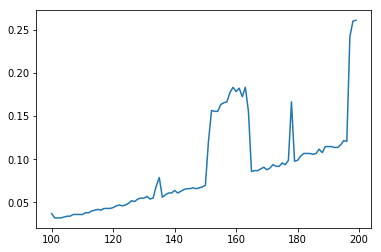

In [12]:
#Q1(b) Varying time taken v/s m

m = 200
n = 100
start_m = 100
time_cnt = []
X = np.random.randint(2,size =(m,n))
Y = np.random.randint(2,size = m)
time_cnt = []
for i in range(start_m,m):
    
    X_c = X[:i, :]
    Y_c = Y[:i]
    train_x, test_x, train_y, test_y = train_test_split(X_c,Y_c, test_size=0.3, random_state=42)
    start_time = time.time()
    predM = KNN_predict('regression_plot',train_x,train_y,test_x,5,'Manhattan')
    elapsed = time.time()-start_time
    time_cnt.append(elapsed)

M_list  = range(start_m,m)
plt.plot(M_list,time_cnt)

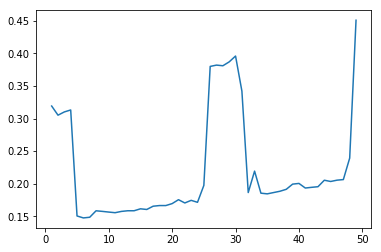

In [13]:
#Q1(b) Varying time taken v/s N
m = 300
n = 50
X = np.random.randint(2,size =(m,n))
Y = np.random.randint(2,size = m)
start_n = 1
time_cnt = []
for i in range(start_n,n):
    
    X_c = X[:,:i]
    Y_c = Y
    train_x, test_x, train_y, test_y = train_test_split(X_c,Y_c, test_size=0.3, random_state=42)
    start_time = time.time()
    predM = KNN_predict('regression_plot',train_x,train_y,test_x,5,'Manhattan')
    elapsed = time.time()-start_time
    time_cnt.append(elapsed)


N_list  = range(start_n,n)
plt.plot(N_list,time_cnt)